In [1]:
from evaluate import *

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
methods = [dir for dir in os.listdir("../results") if "GNEMS" in dir and dir != "old_GNEMS"]
# spawn threads
threads = []
for method in methods:
    t = threading.Thread(target=evaluate, args=(method,))
    threads.append(t)
    t.start()
# wait for threads to finish
for i,t in enumerate(threads):
    t.join()

with open("../results/results.json", "w") as f:
    json.dump(results, f, indent=4)
with open("../results/results.json", "r") as f:
    results = json.load(f)


Evaluating GNEMS_more_slic_segments...
Evaluating GNEMS_lower_stride...
Evaluating GNEMS_higher_lambda...
Evaluating GNEMS_lower_sigma...
Evaluating GNEMS_more_slic_segments on clouds dataset (1/3)...
Evaluating GNEMS_hyperset2...
Evaluating GNEMS_lower_stride on clouds dataset (1/3)...
Evaluating GNEMS_higher_stride...
Evaluating GNEMS_lower_sigma on clouds dataset (1/3)...Evaluating GNEMS_larger_patches...

Evaluating GNEMS_higher_stride on clouds dataset (1/3)...
Evaluating GNEMS_higher_sigma...
Evaluating GNEMS_smaller_patches...
Evaluating GNEMS...
Evaluating GNEMS_higher_lambda on clouds dataset (1/3)...
Evaluating GNEMS_larger_patches on clouds dataset (1/3)...
Evaluating GNEMS_hyperset2 on clouds dataset (1/3)...Evaluating GNEMS_lower_lambda...
Evaluating GNEMS_higher_sigma on clouds dataset (1/3)...Evaluating GNEMS_smaller_patches on clouds dataset (1/3)...

Evaluating GNEMS_lower_lambda on clouds dataset (1/3)...
Evaluating GNEMS_hyperset1...
Evaluating GNEMS on clouds datase

In [3]:
sorted(list(results.keys()))

['GNEMS',
 'GNEMS_higher_lambda',
 'GNEMS_higher_sigma',
 'GNEMS_higher_stride',
 'GNEMS_hyperset1',
 'GNEMS_hyperset2',
 'GNEMS_hyperset3',
 'GNEMS_larger_patches',
 'GNEMS_less_filters',
 'GNEMS_less_slic_segments',
 'GNEMS_lower_lambda',
 'GNEMS_lower_sigma',
 'GNEMS_lower_stride',
 'GNEMS_more_filters',
 'GNEMS_more_slic_segments',
 'GNEMS_smaller_patches']

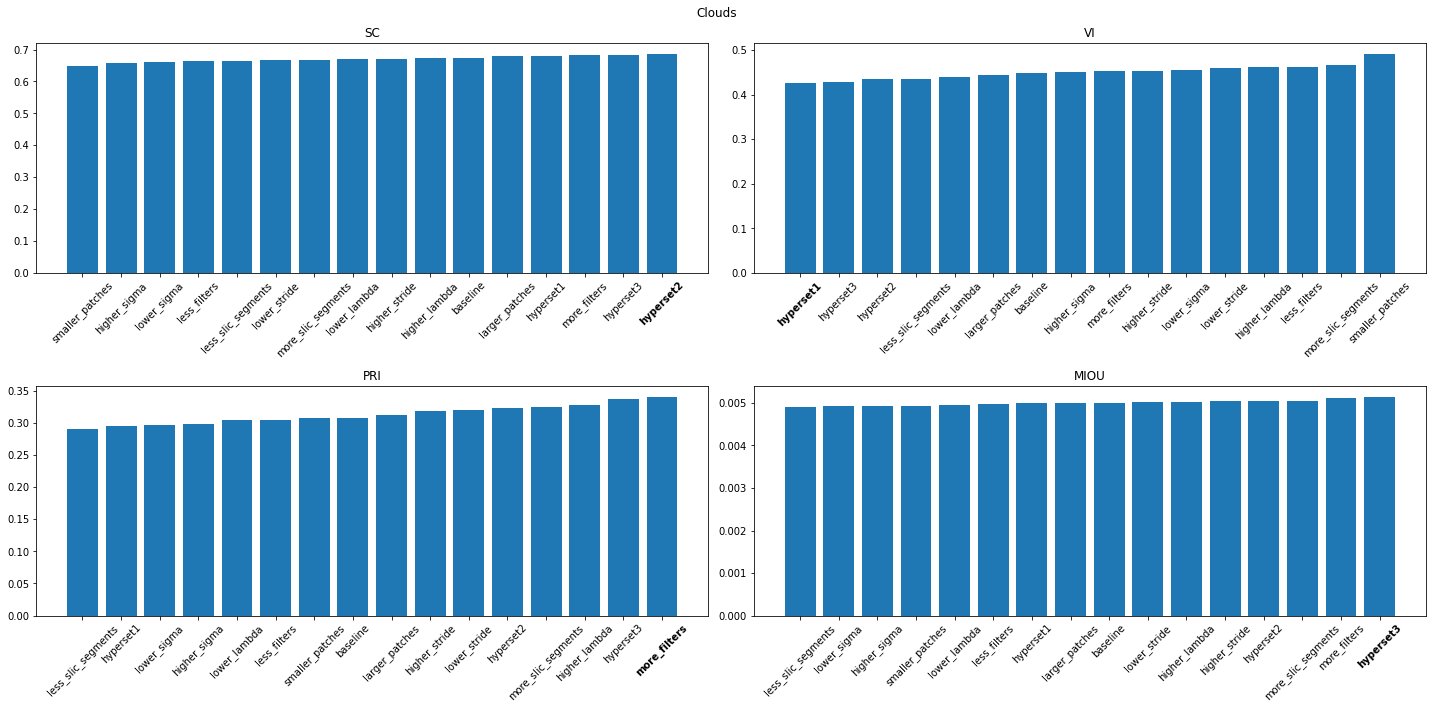

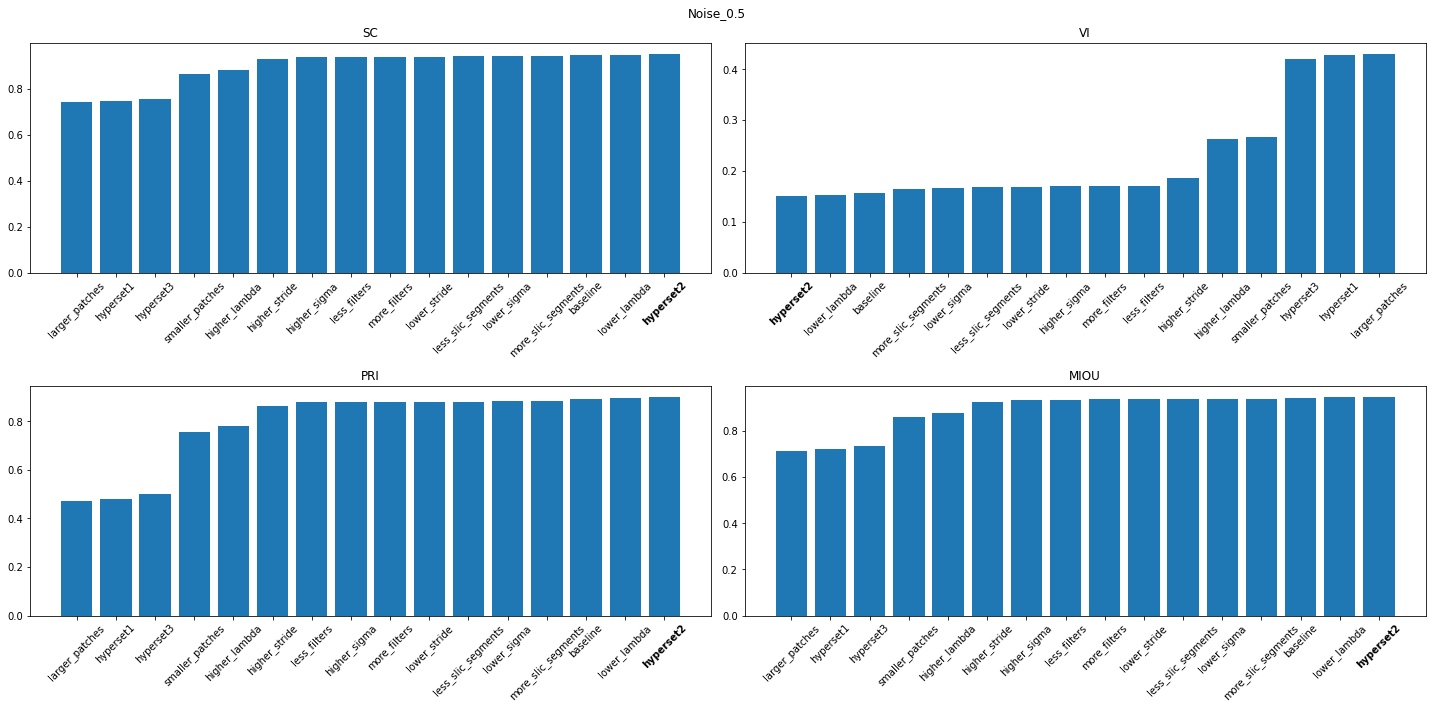

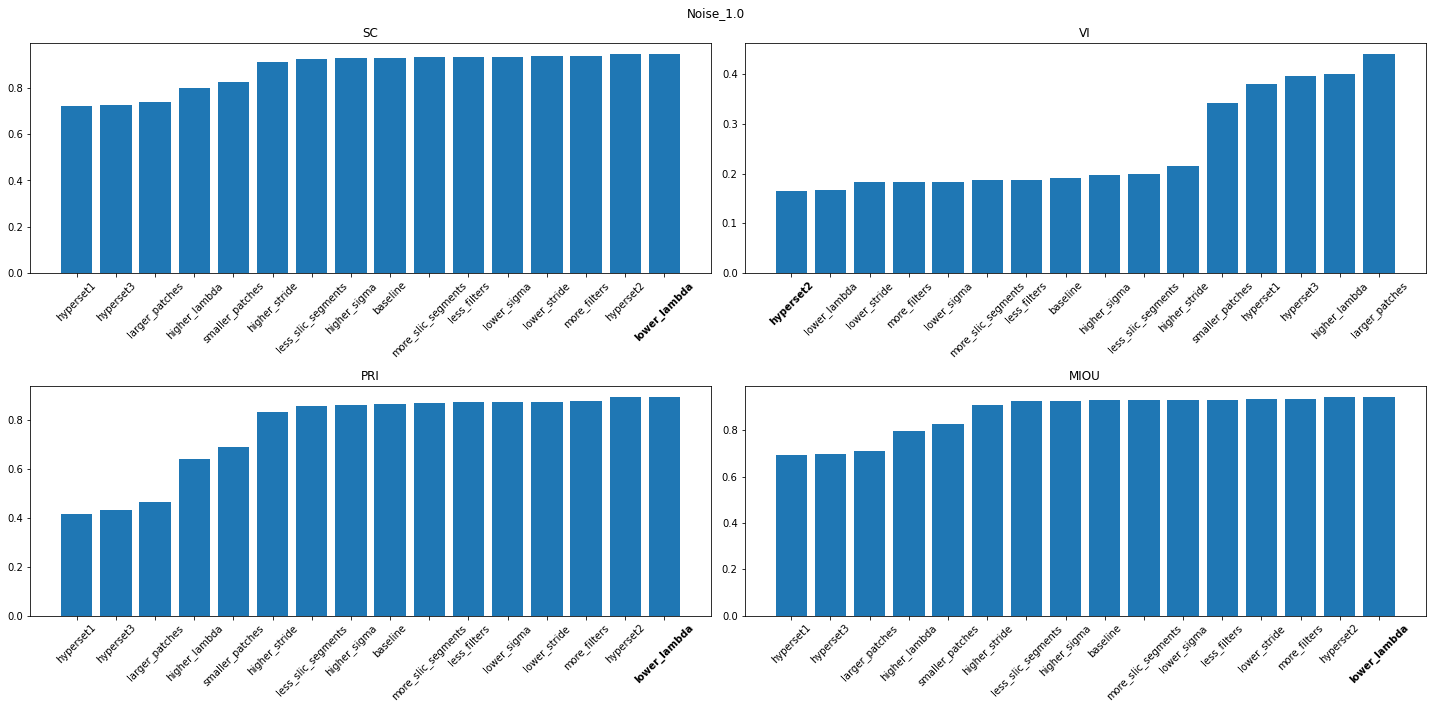

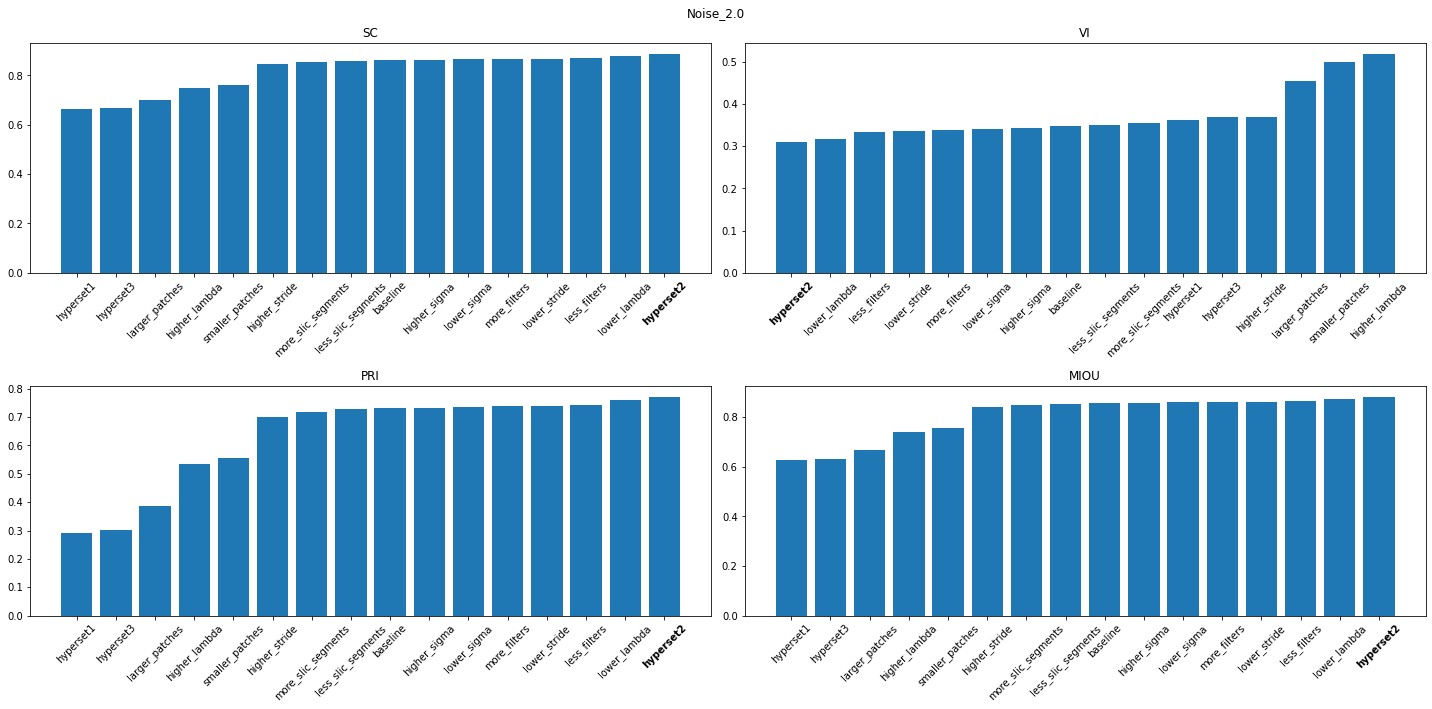

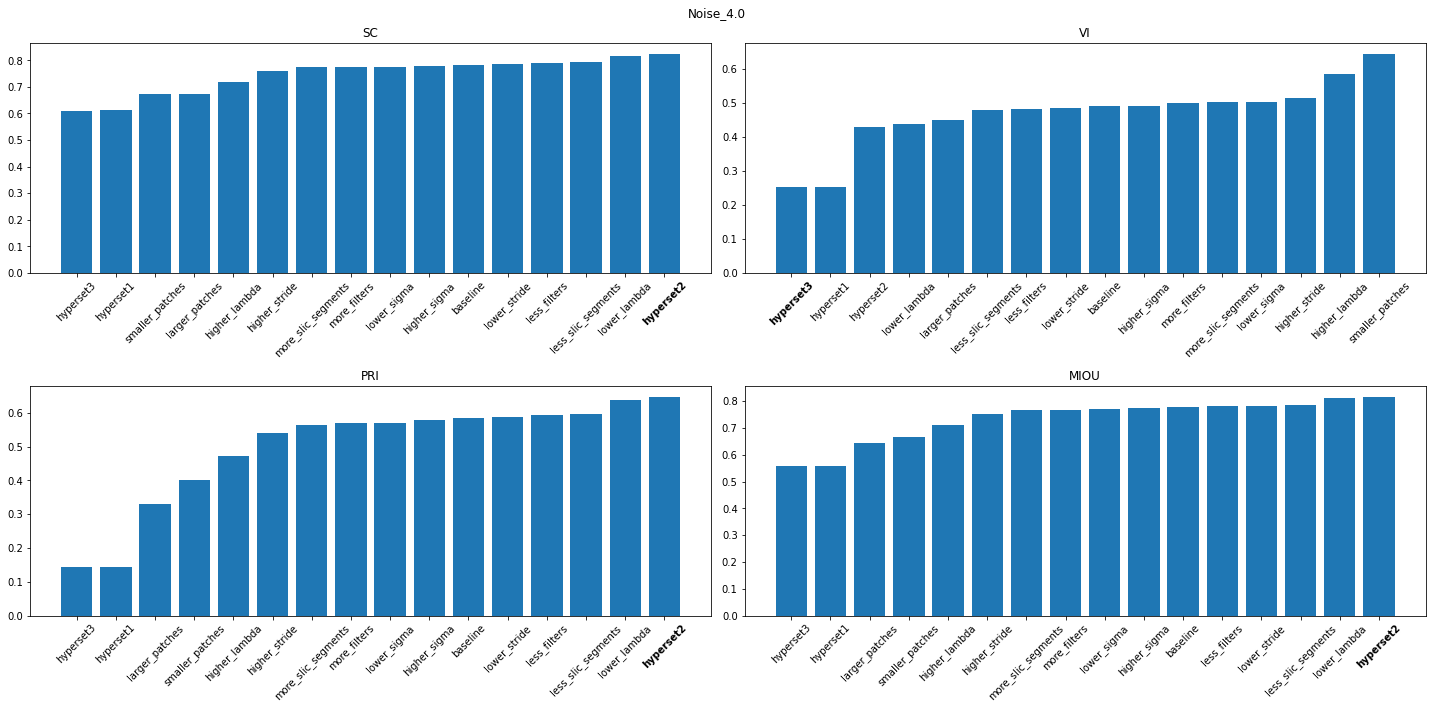

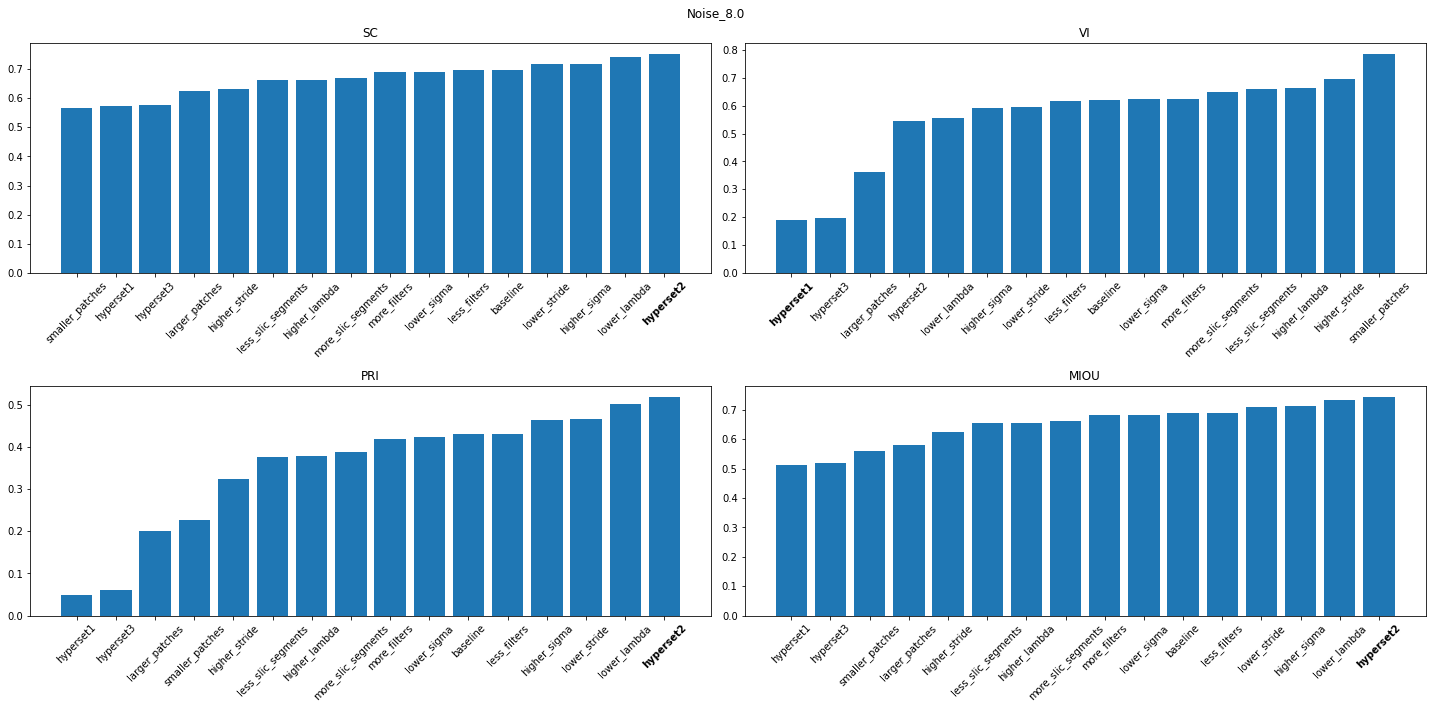

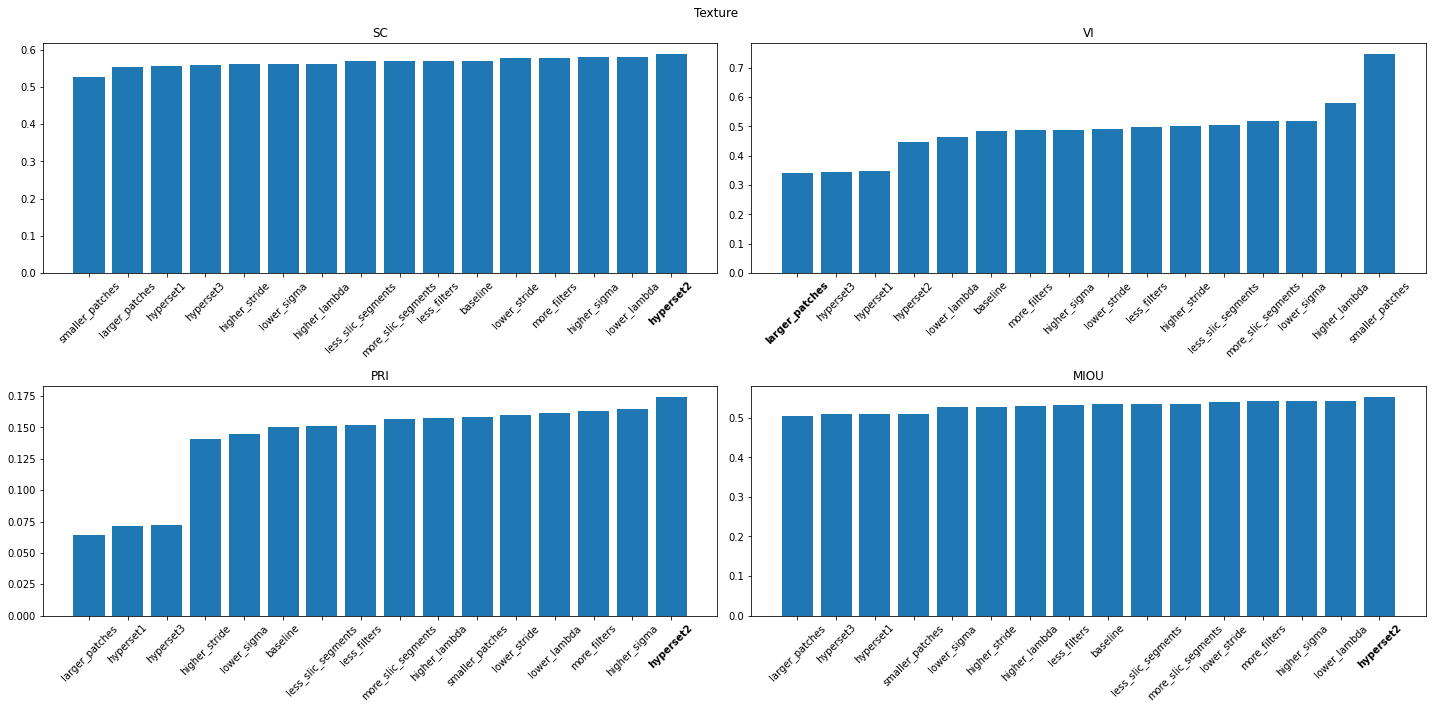

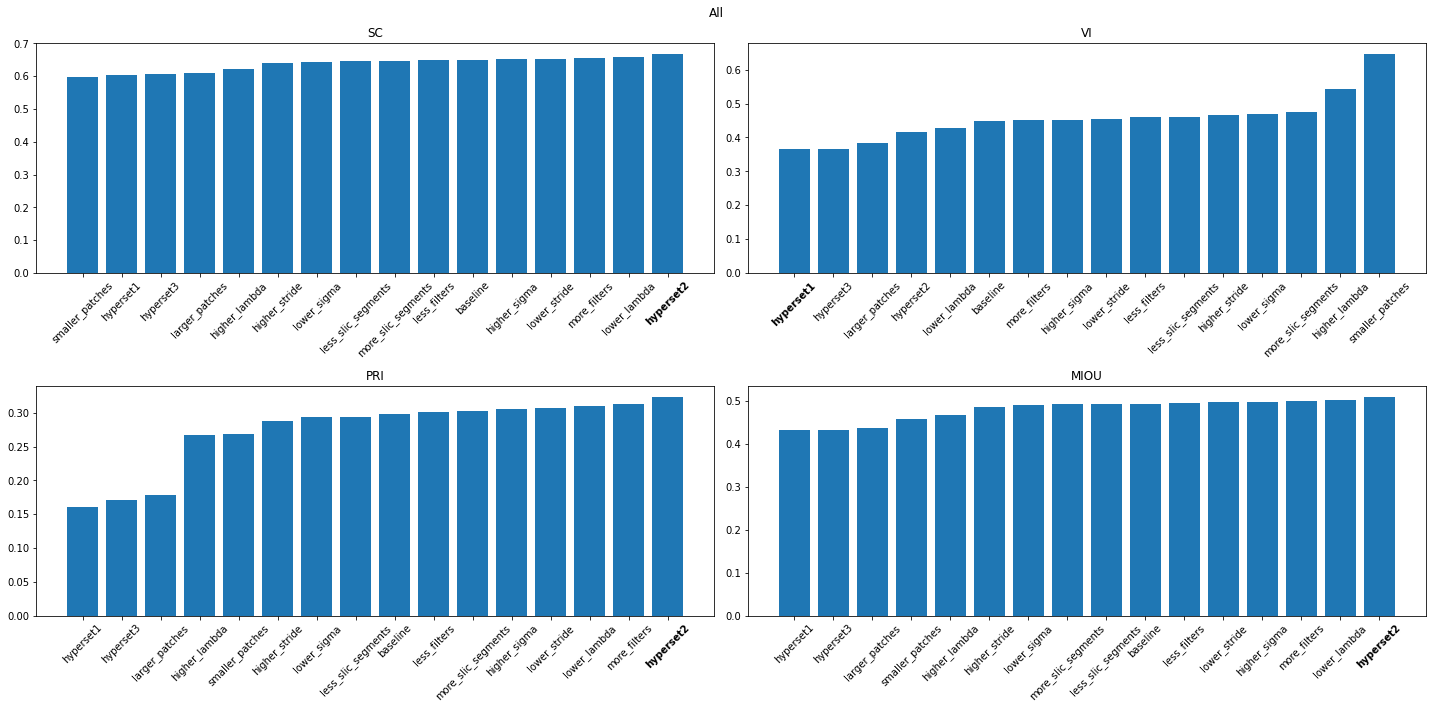

In [4]:
metrics = ["sc", "vi", "pri", "miou"]
tasks = list(results[methods[0]].keys())
for task in tasks:
    fig, axs = plt.subplots(2, 2, figsize=(20,10))
    fig.suptitle(task.capitalize())
    for i,metric in enumerate(metrics):
        values = []
        labels = []
        for method in methods:
            values.append(results[method][task][metric])
            labels.append("_".join(method.split("_")[1:]) if method != "GNEMS" else "baseline")
        # sort by values
        values, labels = zip(*sorted(zip(values, labels)))
        bolding_method = np.argmax if metric.lower() != "vi" else np.argmin
        # labels[bolding_method(values)] = "\\textbf{" + labels[bolding_method(values)] + "}"
        axs[i//2, i%2].bar(labels, values)
        axs[i//2, i%2].set_title(metric.upper())
        axs[i//2, i%2].get_xticklabels()[bolding_method(values)].set_fontweight("bold")
        # angle all xticks
        for tick in axs[i//2, i%2].get_xticklabels():
            tick.set_rotation(45)
            tick.set_x(-5)
    plt.tight_layout()
    plt.show()
        
        